# 유방암 종양 예측
---
## 악성 종양인지, 양성 종양(정상)인지 예측

## 데이터셋 불러오기

* radius : 반경
* texture : 질감
* perimeter : 둘레
* area : 면적
* smoothness : 매끄러움
* compactness : 조그만 정도
* concavity : 윤곽의 오목함
* concave points : 윤곽의 오목한 부분의 수
* symmetry : 대칭
* fractal dimension : 프랙탈 차원
* target : Malignant-악성 종양 / Benign-양성 종양(정상)
---
* mean ~ : 데이터별 평균 값
* ~ error : 데이터별 표준편차 값
* worst ~ : 데이터별 가장 큰 3개의 평균으로 만든 값

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DrKAI/dataset/main/breast_cancer.csv')

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 데이터 전처리

<details><summary>Hint</summary>

* x, y 구분 필요
* y에 대한 전처리 필요
* 데이터셋 구분 필요

</details>

In [4]:
target = 'target'

x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 2023)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Locally connected layer를 구성하기 위한 feature 설정

* mean, error, worst를 각 feature별로 묶어 새로운 변수를 만든다.
        ex) mean radius, radius error, worst radius

<details><summary> Hint </summary>

* x의 train 구조와 test 구조는 동일해야 한다.

</details>

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 272 to 537
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness error        

In [8]:
x_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.210512,19.216659,92.528813,664.228352,0.096443,0.104425,0.089994,0.049640,0.181271,0.062784,...,16.336703,25.546242,107.788527,890.091209,0.132106,0.252429,0.272210,0.114891,0.288913,0.083603
std,3.626863,4.257648,25.023685,366.829600,0.014349,0.053674,0.082440,0.040036,0.028315,0.007168,...,4.956921,6.066308,34.528123,590.559680,0.022966,0.157724,0.211045,0.067361,0.062873,0.018253
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.110000,75.190000,420.650000,0.086170,0.063515,0.026880,0.020365,0.161750,0.057650,...,13.020000,20.900000,84.095000,514.600000,0.116400,0.143600,0.105500,0.063595,0.249450,0.071250
50%,13.400000,18.890000,86.340000,556.700000,0.095970,0.092180,0.061950,0.033340,0.178800,0.061440,...,14.970000,25.400000,97.820000,686.600000,0.131200,0.215600,0.229900,0.099750,0.281900,0.080090
75%,15.900000,21.640000,105.750000,790.850000,0.105400,0.130550,0.132950,0.076045,0.196650,0.066045,...,18.800000,29.690000,125.250000,1086.000000,0.146000,0.339500,0.386300,0.161950,0.316300,0.091300
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,47.160000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [9]:
x_train_radius = x_train.loc[:, ['mean radius', 'radius error', 'worst radius']]
x_test_radius = x_test.loc[:, ['mean radius', 'radius error', 'worst radius']]

x_train_texture = x_train.loc[:, ['mean texture', 'texture error', 'worst texture']]
x_test_texture = x_test.loc[:, ['mean texture', 'texture error', 'worst texture']]

x_train_perimeter = x_train.loc[:, ['mean perimeter', 'perimeter error', 'worst perimeter']]
x_test_perimeter = x_test.loc[:, ['mean perimeter', 'perimeter error', 'worst perimeter']]

x_train_area = x_train.loc[:, ['mean area', 'area error', 'worst area']]
x_test_area = x_test.loc[:, ['mean area', 'area error', 'worst area']]

x_train_smoothness = x_train.loc[:, ['mean smoothness', 'smoothness error', 'worst smoothness']]
x_test_smoothness = x_test.loc[:, ['mean smoothness', 'smoothness error', 'worst smoothness']]

x_train_compactness = x_train.loc[:, ['mean compactness', 'compactness error', 'worst compactness']]
x_test_compactness = x_test.loc[:, ['mean compactness', 'compactness error', 'worst compactness']]

x_train_concavity = x_train.loc[:, ['mean concavity', 'concavity error', 'worst concavity']]
x_test_concavity = x_test.loc[:, ['mean concavity', 'concavity error', 'worst concavity']]

x_train_concave_points = x_train.loc[:, ['mean concave points', 'concave points error', 'worst concave points']]
x_test_concave_points = x_test.loc[:, ['mean concave points', 'concave points error', 'worst concave points']]

x_train_symmetry = x_train.loc[:, ['mean symmetry', 'symmetry error', 'worst symmetry']]
x_test_symmetry = x_test.loc[:, ['mean symmetry', 'symmetry error', 'worst symmetry']]

x_train_fractal_dimension = x_train.loc[:, ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension']]
x_test_fractal_dimension = x_test.loc[:, ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension']]


In [10]:
x_train_radius.shape

(455, 3)

In [11]:
y_train_df = pd.DataFrame(y_train)

y_train_df['target'] = np.where(y_train_df['target'] == 'Malignant', 1, 0)
print(y_train_df)

     target
272       1
404       0
182       1
198       1
405       0
..      ...
470       0
52        0
515       0
454       0
537       0

[455 rows x 1 columns]


In [12]:
y_test_df = pd.DataFrame(y_test)
y_test_df['target'] = np.where(y_test_df['target'] == 'Malignant', 1, 0)

In [13]:
y_train = np.where(y_train.values == 'Malignant', 1, 0)
y_test = np.where(y_test.values == 'Malignant', 1, 0)

In [14]:
# from tensorflow.keras.utils import to_categorical

# len_y = len(set(y_train))

# y_train = to_categorical(y_train, len_y)
# y_test = to_categorical(y_test, len_y)

In [15]:
y_train.shape, y_test.shape

((455,), (114,))

## 모델링
![예시](https://raw.githubusercontent.com/DrKAI/image/main/cancer_locally.png)

1. 윗 단계에서 생성한 변수의 **형태**를 이용하여, 각 변수별 input layer를 만든다.
2. node가 12개인 hidden layer를 **각각** 생성하여, 각 input layer와 연결한다.
3. 생성된 hidden layer를 add 한다.
---
4. 전체 변수를 이용한 input layer를 만든다.
5. 3번 단계로 add 된 레이어와 4번 단계로 만들어진 input layer를 concat한다.
---
6. node가 128개인 hidden layer를 5번 단계로 concat된 레이어와 연결한다.
7. output layer를 생성하고 compile 한다.

In [16]:
# 패키지 선언
import tensorflow as tf
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Input, Dense, Add, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [17]:
# 0   mean radius              455 non-null    float64\
#  1   mean texture             455 non-null    float64\
#  2   mean perimeter           455 non-null    float64\
#  3   mean area                455 non-null    float64\
#  4   mean smoothness          455 non-null    float64\
#  5   mean compactness         455 non-null    float64\
#  6   mean concavity           455 non-null    float64\
#  7   mean concave points      455 non-null    float64\
#  8   mean symmetry            455 non-null    float64\
#  9   mean fractal dimension   455 non-null    float64\
#  10  radius error             455 non-null    float64\
#  11  texture error            455 non-null    float64\
#  12  perimeter error          455 non-null    float64\
#  13  area error               455 non-null    float64\
#  14  smoothness error         455 non-null    float64\
#  15  compactness error        455 non-null    float64\
#  16  concavity error          455 non-null    float64\
#  17  concave points error     455 non-null    float64\
#  18  symmetry error           455 non-null    float64\
#  19  fractal dimension error  455 non-null    float64\
#  20  worst radius             455 non-null    float64\
#  21  worst texture            455 non-null    float64\
#  22  worst perimeter          455 non-null    float64\
#  23  worst area               455 non-null    float64\
#  24  worst smoothness         455 non-null    float64\
#  25  worst compactness        455 non-null    float64\
#  26  worst concavity          455 non-null    float64\
#  27  worst concave points     455 non-null    float64\
#  28  worst symmetry           455 non-null    float64\
#  29  worst fractal dimension  455 non-null    float64
 

In [18]:
# 1. 세션 클리어
clear_session()

# 2. 모델 사슬처럼 엮기: add
il_radius = Input(shape = (3, ), name = 'Input_Radius')
il_texture = Input(shape = (3, ), name = 'Input_texture')
il_perimeter = Input(shape = (3, ), name = 'Input_perimeter')
il_area = Input(shape = (3, ), name = 'Input_area')
il_smoothness = Input(shape = (3, ), name = 'Input_smoothness')
il_compactness = Input(shape = (3, ), name = 'Input_compactness')
il_concavity = Input(shape = (3, ), name = 'Input_concavity')
il_concave_points = Input(shape = (3, ), name = 'Input_concave_points')
il_symmetry = Input(shape = (3, ), name = 'Input_sysmmetry')
il_fractal_dimension = Input(shape = (3, ), name = 'Input_fractal_dimension')

il_total = Input(shape = (30, ))

hl_radius = Dense(12, activation = relu, name = 'Hidden_Radius')(il_radius)
hl_texture = Dense(12, activation = relu, name = 'Hidden_texture')(il_texture)
hl_perimeter = Dense(12, activation = relu, name = 'Hidden_perimeter')(il_perimeter)
hl_area = Dense(12, activation = relu, name = 'Hidden_area')(il_area)
hl_smoothness = Dense(12, activation = relu, name = 'Hidden_smoothness')(il_smoothness)
hl_compactness = Dense(12, activation = relu, name = 'Hidden_compactness')(il_compactness)
hl_concavity = Dense(12, activation = relu, name = 'Hidden_concavity')(il_concavity)
hl_concave_points = Dense(12, activation = relu, name = 'Hidden_concave_points')(il_concave_points)
hl_symmetry = Dense(12, activation = relu, name = 'Hidden_symmetry')(il_symmetry)
hl_fractal_dimension = Dense(12, activation = relu, name = 'Hidden_fractal_dimension')(il_fractal_dimension)

al = Add()([il_radius, il_texture, il_perimeter, il_area, il_smoothness, il_compactness, il_concavity, 
            il_concave_points, il_symmetry, il_fractal_dimension])

cl = Concatenate()([il_total, al])

hl_128 = Dense(128, activation = relu)(cl)

ol = Dense(1, activation='sigmoid')(hl_128)

# 3. 모델 시작/끝 지정
model = Model([il_total, il_radius, il_texture, il_perimeter, il_area, il_smoothness, il_compactness, il_concavity, 
            il_concave_points, il_symmetry, il_fractal_dimension], ol)

# 4. 컴파일
model.compile(loss = categorical_crossentropy,
              metrics = ['accuracy'],
              optimizer = Adam(0.001))

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Radius (InputLayer)      [(None, 3)]          0           []                               
                                                                                                  
 Input_texture (InputLayer)     [(None, 3)]          0           []                               
                                                                                                  
 Input_perimeter (InputLayer)   [(None, 3)]          0           []                               
                                                                                                  
 Input_area (InputLayer)        [(None, 3)]          0           []                               
                                                                                              

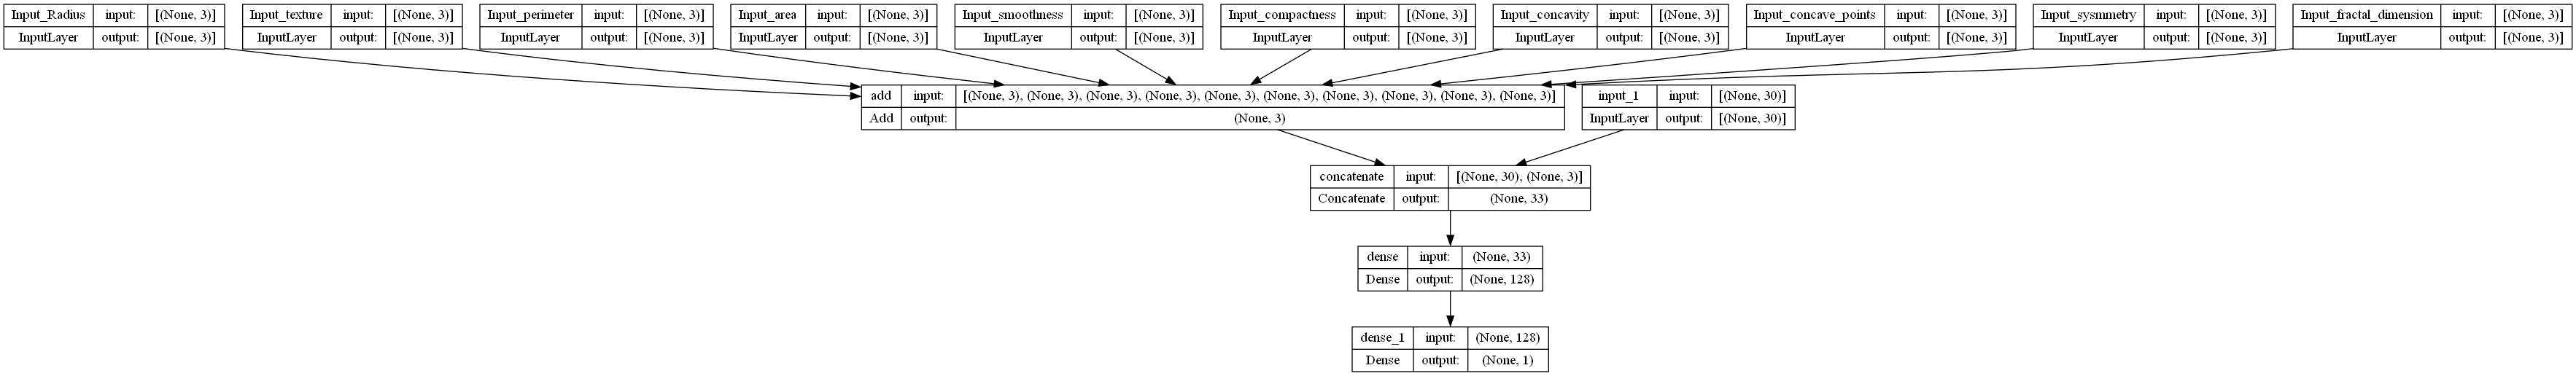

In [19]:
plot_model(model, show_shapes = True)

In [20]:
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 10,
                   verbose = 1,
                   restore_best_weights = True)

In [21]:
model.fit([x_train, x_train_radius, x_train_texture, x_train_perimeter, x_train_area, x_train_smoothness, 
           x_train_compactness, x_train_concavity, x_train_concave_points, x_train_symmetry, x_train_fractal_dimension], y_train,
          epochs = 1000,
          validation_split = 0.2,
          callbacks = [es],
          verbose = 1)

Epoch 1/1000
12/12 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - accuracy: 0.6291 - val_loss: 0.0000e+00 - val_accuracy: 0.6264
Epoch 2/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6291 - val_loss: 0.0000e+00 - val_accuracy: 0.6264
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6291 - val_loss: 0.0000e+00 - val_accuracy: 0.6264
Epoch 4/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.6291 - val_loss: 0.0000e+00 - val_accuracy: 0.6264
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.6291 - val_loss: 0.0000e+00 - val_accuracy: 0.6264
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6291 - val_loss: 0.0000e+00 - val_accuracy: 0.6264
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.

## 평가

1. 모델의 정확도를 확인하시오.
2. 악성이라 예측한 것 중 실제 악성으로 나온 비율을 구하시오.
3. 실제 악성 중 모델이 악성이라 예측한 것의 비율을 구하시오.
4. 정상이라 예측한 것 중 실제 정상으로 나온 비율을 구하시오.

In [22]:
test_list = [x_test, x_test_radius, x_test_texture, x_test_perimeter, 
              x_test_area, x_test_smoothness, x_test_compactness, 
              x_test_concavity, x_test_concave_points, x_test_symmetry, 
              x_test_fractal_dimension]

In [23]:
y_pred = model.predict(test_list)

4/4 [==============================] - 0s 1ms/step


In [24]:
model.evaluate(test_list, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6228


[0.0, 0.6228070259094238]

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred, target_names = ['Benign' , 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.62      1.00      0.77        71
   Malignant       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
